In [1]:
from rdkit import Chem

import numpy as np
import pandas as pd
import amat_utils

## initialize

In [2]:
target = Chem.MolFromSmiles("O=C(C[C@@H]1OCC=C2CN3CC[C@]4([C@@]56[H])[C@@]([H])3C[C@@]2([C@@]16[H])[H])N5C7=C4C=CC=C7")
target = Chem.MolFromSmiles(Chem.MolToSmiles(target))
Chem.Kekulize(target,clearAromaticFlags=True)

In [3]:
target_atoms = [atm.GetAtomicNum() for atm in target.GetAtoms()]
target_symbs = [atm.GetSymbol() for atm in target.GetAtoms()]

In [4]:
amat = Chem.GetAdjacencyMatrix(target,useBO=True,force=True)
amat_init = Chem.GetAdjacencyMatrix(target,useBO=True,force=True)


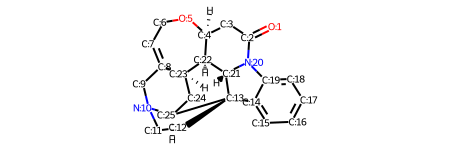

In [6]:
amat_utils.mol_with_atom_index(target)

### MacMillan route

In [7]:
changelogs = amat_utils.make_changelogs("./edit_files/edits_strychnine_macmillan.csv")
changelogs[:3]

[{'edits': ()},
 {'pad': 0,
  'pad_elem': [],
  'edits': [(4, 4, 1),
   (13, 13, 1),
   (21, 21, 1),
   (22, 22, 1),
   (23, 23, 1),
   (25, 25, 1)]},
 {'pad': 1, 'pad_elem': [8], 'edits': [(20, 2, -1), (3, 4, -1), (4, 26, 1)]}]

In [8]:
out_1,final_atoms_1 = amat_utils.apply_changes(amat_init, target_atoms,changelogs[1:])

In [10]:
draw_mols = []
from rdkit.Chem.Draw import *
for i in range(len(out_1)):
    m = amat_utils.molFromAdjMat(final_atoms_1,out_1[i])
    Chem.SanitizeMol(m)
    draw_mols.append(m)
    print(Chem.MolToSmiles(m))

C.C.C=CC=O.CC=O.COC=O.COCC=C(C)I.C[SeH].O.c1ccc2c3c([nH]c2c1)CNCC3
C.C=CC=O.CC=O.COC=O.COCC=C(C)I.C[SeH].Cn1c2c(c3ccccc31)CCNC2.O
C.C=CC=O.CC=O.COC=O.COCC=C(C)I.C[SeH].Cn1c(C=O)c(CCN)c2ccccc21
C.C=CC=O.CC=O.COC=O.COCC=C(C)I.Cn1c(C=C[SeH])c(CCN)c2ccccc21.O
C.CC=O.CN1C2=CC=C(C=O)C3NCCC23c2ccccc21.COC=O.COCC=C(C)I.O.[SeH2]
C.C.CC=O.CN1C2=CC=CC3NCCC23c2ccccc21.COC=O.COCC=C(C)I.O.O.[SeH2]
C.C.CC=O.COC(=O)C1=C2N(C)c3ccccc3C23CCNC3C=C1.COCC=C(C)I.O.O.[SeH2]
C.C.CC=O.COC(=O)C1=CCC2NCCC23c2ccccc2N(C)C13.COCC=C(C)I.O.O.[SeH2]
C.C.CC=O.COCC=C(I)CN1CCC23c4ccccc4N(C)C2C(C(=O)OC)=CCC13.O.O.[SeH2]
C.C.C.C.CC=O.CN1c2ccccc2C23CCN(CC(I)=CCO)C2CC=C(CO)C13.O.O.O.[SeH2]
C.C.C.C.CC=O.CN1c2ccccc2C23CCN4CC5=CCOC(O)C(C5CC42)C13.I.O.O.O.[SeH2]
C.C.C.C.C.CC=O.I.O.O.O.OC1OCC=C2CN3CCC45c6ccccc6NC4C1C2CC35.[SeH2]
C.C.C.C.C.I.O.O.O.O.O=C1CC2OCC=C3CN4CCC56c7ccccc7N1C5C2C3CC46.[SeH2]
C.C.C.C.C.I.O.O.O.O.O=C1CC2OCC=C3CN4CCC56c7ccccc7N1C5C2C3CC46.[SeH2]


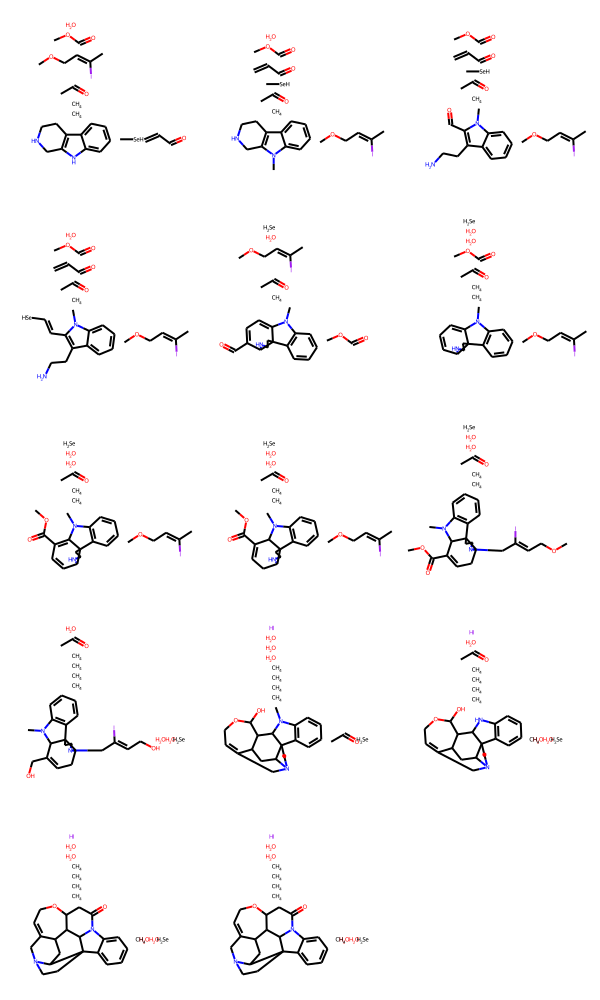

In [11]:
Chem.Draw.MolsToGridImage(draw_mols)

In [12]:
save_dict = {"amats":out_1[:-1],"atoms":final_atoms_1}
np.savez("./matrices/strychnine_macmillan",**save_dict)

### Vanderwal route

In [13]:
changelogs = amat_utils.make_changelogs("./edit_files/edits_strychnine_vanderwal.csv")
changelogs[:3]

[{'edits': ()},
 {'pad': 0,
  'pad_elem': [],
  'edits': [(4, 4, 1),
   (13, 13, 1),
   (21, 21, 1),
   (22, 22, 1),
   (23, 23, 1),
   (25, 25, 1)]},
 {'pad': 1,
  'pad_elem': [8],
  'edits': [(20, 2, -1), (3, 4, -1), (4, 26, 1), (4, 4, -1)]}]

In [14]:
out_1,final_atoms_1 = amat_utils.apply_changes(amat_init, target_atoms,changelogs[1:])

In [15]:
draw_mols = []
from rdkit.Chem.Draw import *
for i in range(len(out_1)):
    m = amat_utils.molFromAdjMat(final_atoms_1,out_1[i])
    Chem.SanitizeMol(m)
    draw_mols.append(m)
    print(Chem.MolToSmiles(m))

Br.CC=O.CNCCc1c[nH]c2ccccc12.O.OCC#CCO.[SiH4].c1ccncc1
Br.CC=O.CNCCc1c[nH]c2ccccc12.O.OCC1=CCO[SiH2]1.c1ccncc1
BrCC1=CCO[SiH2]1.CC=O.CNCCc1c[nH]c2ccccc12.O.O.c1ccncc1
CC=O.CNCCc1c[nH]c2ccccc12.O.O.OCC=C([SiH3])CBr.c1ccncc1
CC=O.CN(C=CC=CC=O)CCc1c[nH]c2ccccc12.N.O.OCC=C([SiH3])CBr
CC=O.CN1CCC23c4ccccc4NC2C(C=O)=CCC13.N.O.OCC=C([SiH3])CBr
C.CC=O.N.O.O=CC1=CCC2NCCC23c2ccccc2NC13.OCC=C([SiH3])CBr
Br.C.CC=O.N.O.O=CC1=CCC2N(CC([SiH3])=CCO)CCC23c2ccccc2NC13
Br.C.CC=O.N.O.OC1OCC=C2CN3CCC45c6ccccc6NC4C1C2CC35.[SiH4]
Br.C.N.O.O.O=C1CC2OCC=C3CN4CCC56c7ccccc7N1C5C2C3CC46.[SiH4]
Br.C.N.O.O.O=C1CC2OCC=C3CN4CCC56c7ccccc7N1C5C2C3CC46.[SiH4]


In [16]:
save_dict = {"amats":out_1[:-1],"atoms":final_atoms_1}
np.savez("./matrices/strychnine_vanderwal",**save_dict)